In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

# Data Loading and Initial Exploration

This section loads the two datasets, `Crop_recommendation.csv` (Environmental Parameters) and `crop_yield.csv`, into pandas DataFrames. It also includes initial checks of the data, such as displaying the head of the DataFrames, checking their shapes, and getting basic descriptive statistics and information about the columns and their data types.

Importing all the needed libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Data set 1

This Dataset has all the Eniviromental Parameters like Temperature, Humidity, ph, Rainfall and Nutrient values of the soil.


In [3]:
Env_Parameters = pd.read_csv('/content/drive/MyDrive/Crop_Prediction_Project/Crop_recommendation.csv')

In [4]:
Env_Parameters.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
Env_Parameters["label"].value_counts()

,count
label,
rice,100
maize,100
chickpea,100
kidneybeans,100
pigeonpeas,100
mothbeans,100
mungbean,100
blackgram,100
lentil,100


In [6]:
Env_Parameters.shape

(2200, 8)

In [7]:
Env_Parameters.describe()
Env_Parameters.info()
Env_Parameters.index

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


RangeIndex(start=0, stop=2200, step=1)

In [8]:
Env_Parameters['label'] = Env_Parameters['label'].str.capitalize()

In [9]:
Env_Parameters['label'].value_counts()

,count
label,
Rice,100
Maize,100
Chickpea,100
Kidneybeans,100
Pigeonpeas,100
Mothbeans,100
Mungbean,100
Blackgram,100
Lentil,100


Data set 2

This Dataset has So many parameters like crop, Crop_year, Season, State etc. But We are interested in Crop, Season and Yield. Hence Considering only 3 columns to merge with the Env_parameters Data Frame.


In [10]:
crop_yield = pd.read_csv('/content/drive/MyDrive/Crop_Prediction_Project/crop_yield.csv')
crop_yield.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909


In [11]:
crop_yield = crop_yield[["Crop", "Season", "Yield"]]
crop_yield.head()

,Crop,Season,Yield
0,Arecanut,Whole Year,0.796087
1,Arhar/Tur,Kharif,0.710435
2,Castor seed,Kharif,0.238333
3,Coconut,Whole Year,5238.051739
4,Cotton(lint),Kharif,0.420909


# Data Cleaning and Preparation

This section focuses on cleaning and preparing the data for merging. It includes steps like:
- Selecting relevant columns from the `crop_yield` DataFrame.
- Handling outliers in the 'Yield' column using the Interquartile Range (IQR) method.
- Standardizing the 'Crop' and 'label' columns by stripping whitespace and converting to lowercase for consistent merging.
- Creating a mapping for crop names to unify similar entries across datasets.
- Creating a mapping to associate crops with potential soil types and adding a 'Soil_Type' column based on this mapping.

As there are so many Outliers in Yield column, Interquartile Range (IQR) is used to remove them.

In [12]:
Q1 = crop_yield['Yield'].quantile(0.25)
Q3 = crop_yield['Yield'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
crop_yield_clean = crop_yield[(crop_yield['Yield'] >= lower_bound) & (crop_yield['Yield'] <= upper_bound)]


In [13]:
crop_yield_clean.head()

,Crop,Season,Yield
0,Arecanut,Whole Year,0.796087
1,Arhar/Tur,Kharif,0.710435
2,Castor seed,Kharif,0.238333
4,Cotton(lint),Kharif,0.420909
5,Dry chillies,Whole Year,0.643636


In [14]:
print("Original shape:", crop_yield.shape)
print("Cleaned shape:", crop_yield_clean.shape)


Original shape: (19689, 3)
Cleaned shape: (16624, 3)


In [15]:
crop_yield_clean.shape

(16624, 3)

In [16]:
crop_yield_clean.describe()
crop_yield_clean.info()
crop_yield_clean.index

<class 'pandas.core.frame.DataFrame'>
Index: 16624 entries, 0 to 19688
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Crop    16624 non-null  object 
 1   Season  16624 non-null  object 
 2   Yield   16624 non-null  float64
dtypes: float64(1), object(2)
memory usage: 519.5+ KB


Index([    0,     1,     2,     4,     5,     6,     8,     9,    10,    11,
       ...
       19679, 19680, 19681, 19682, 19683, 19684, 19685, 19686, 19687, 19688],
      dtype='int64', length=16624)

In [17]:
crop_yield_clean["Crop"].value_counts()

,count
Crop,
Rice,1195
Maize,917
Moong(Green Gram),740
Urad,733
Groundnut,725
Sesamum,683
Wheat,545
Rapeseed &Mustard,525
Jowar,513


# Merging Datasets

This section merges the cleaned `crop_yield` DataFrame with the `Env_Parameters` DataFrame based on the crop names. It also includes checking the head and shape of the merged DataFrame and dropping the redundant 'label' column.

**MERGE 1**

In [18]:
crop_map = {
    'arecanut': 'coconut',
    'arhar/tur': 'pigeonpeas',
    'castor seed': 'sesamum',
    'cotton(lint)': 'cotton',
    'dry chillies': 'chili',
    'gram': 'chickpea',
    'linseed': 'mustard',
    'mesta': 'jute',
    'niger seed': 'sesamum',
    'onion': 'onion',
    'other  rabi pulses': 'lentil',
    'rapeseed &mustard': 'mustard',
    'sesamum': 'sesamum',
    'small millets': 'mothbeans',
    'sweet potato': 'potato',
    'tapioca': 'cassava',
    'tobacco': 'tobacco',
    'turmeric': 'turmeric',
    'wheat': 'wheat',
    'bajra': 'pearl millet',
    'black pepper': 'pepper',
    'cardamom': 'cardamom',
    'coriander': 'coriander',
    'garlic': 'garlic',
    'ginger': 'ginger',
    'groundnut': 'groundnut',
    'horse-gram': 'horsegram',
    'jowar': 'sorghum',
    'ragi': 'finger millet',
    'cashewnut': 'cashew',
    'soyabean': 'soybean',
    'sugarcane': 'sugarcane',
    'barley': 'barley',
    'khesari': 'lentil',
    'masoor': 'lentil',
    'moong(green gram)': 'mungbean',
    'other kharif pulses': 'blackgram',
    'safflower': 'sunflower',
    'sannhamp': 'sunflower',
    'sunflower': 'sunflower',
    'urad': 'blackgram',
    'peas & beans (pulses)': 'kidneybeans',
    'other oilseeds': 'mustard',
    'other cereals': 'maize',
    'potato': 'potato',
    'cowpea(lobia)': 'cowpea',
    'guar seed': 'cluster beans',
    'oilseeds total': 'mustard',
    'other summer pulses': 'mungbean',
    'moth': 'mothbeans'
}


In [19]:
crop_yield_clean['Crop'] = crop_yield_clean['Crop'].str.strip().str.lower()
Env_Parameters['label'] = Env_Parameters['label'].str.strip().str.lower()

crop_yield_clean['Crop'] = crop_yield_clean['Crop'].replace(crop_map)


/tmp/ipython-input-2746215379.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crop_yield_clean['Crop'] = crop_yield_clean['Crop'].str.strip().str.lower()
/tmp/ipython-input-2746215379.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crop_yield_clean['Crop'] = crop_yield_clean['Crop'].replace(crop_map)


In [20]:
crop_soil_map = {
    'pigeonpeas': 'loamy',
    'sesamum': 'sandy loam',
    'chili': 'sandy loam',
    'mustard': 'loamy',
    'jute': 'alluvial',
    'onion': 'sandy loam',
    'lentil': 'clay loam',
    'mothbeans': 'sandy',
    'cassava': 'laterite',
    'tobacco': 'sandy loam',
    'pearl millet': 'sandy',
    'cardamom': 'forest soil',
    'groundnut': 'sandy loam',
    'horsegram': 'red',
    'sorghum': 'black',
    'blackgram': 'loamy',
    'sunflower': 'loamy',
    'kidneybeans': 'clay loam',
    'cowpea': 'sandy loam',
    'cluster beans': 'sandy',
    'banana': 'loamy'
}


In [21]:
crop_yield_clean['Soil_Type'] = crop_yield_clean['Crop'].map(crop_soil_map)


/tmp/ipython-input-796207727.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crop_yield_clean['Soil_Type'] = crop_yield_clean['Crop'].map(crop_soil_map)


In [22]:
crop_yield_clean.head()

,Crop,Season,Yield,Soil_Type
0,coconut,Whole Year,0.796087,NaN
1,pigeonpeas,Kharif,0.710435,loamy
2,sesamum,Kharif,0.238333,sandy loam
4,cotton,Kharif,0.420909,NaN
5,chili,Whole Year,0.643636,sandy loam


In [23]:
Yield_Pred1 = pd.merge(crop_yield_clean, Env_Parameters, left_on='Crop', right_on='label', how='left')

In [24]:
Yield_Pred1.head()

,Crop,Season,Yield,Soil_Type,N,P,K,temperature,humidity,ph,rainfall,label
0,coconut,Whole Year,0.796087,NaN,18.0,30.0,29.0,26.762749,92.860569,6.420019,224.590366,coconut
1,coconut,Whole Year,0.796087,NaN,37.0,23.0,28.0,25.612944,94.313884,5.740055,224.320676,coconut
2,coconut,Whole Year,0.796087,NaN,13.0,28.0,33.0,28.130115,95.648076,5.686973,151.076190,coconut
3,coconut,Whole Year,0.796087,NaN,2.0,21.0,35.0,25.028872,91.537209,6.293662,179.824894,coconut
4,coconut,Whole Year,0.796087,NaN,10.0,18.0,35.0,27.797977,99.645730,6.381975,181.694228,coconut


In [25]:
Yield_Pred1.drop(["label"], axis=1, inplace=True)

In [26]:
Yield_Pred1.head()

,Crop,Season,Yield,Soil_Type,N,P,K,temperature,humidity,ph,rainfall
0,coconut,Whole Year,0.796087,NaN,18.0,30.0,29.0,26.762749,92.860569,6.420019,224.590366
1,coconut,Whole Year,0.796087,NaN,37.0,23.0,28.0,25.612944,94.313884,5.740055,224.320676
2,coconut,Whole Year,0.796087,NaN,13.0,28.0,33.0,28.130115,95.648076,5.686973,151.076190
3,coconut,Whole Year,0.796087,NaN,2.0,21.0,35.0,25.028872,91.537209,6.293662,179.824894
4,coconut,Whole Year,0.796087,NaN,10.0,18.0,35.0,27.797977,99.645730,6.381975,181.694228


In [27]:
Yield_Pred1.shape

(769222, 11)

In [28]:
Yield_Pred1.describe()
Yield_Pred1.info()
Yield_Pred1.index

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 769222 entries, 0 to 769221
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Crop         769222 non-null  object 
 1   Season       769222 non-null  object 
 2   Yield        769222 non-null  float64
 3   Soil_Type    354427 non-null  object 
 4   N            760200 non-null  float64
 5   P            760200 non-null  float64
 6   K            760200 non-null  float64
 7   temperature  760200 non-null  float64
 8   humidity     760200 non-null  float64
 9   ph           760200 non-null  float64
 10  rainfall     760200 non-null  float64
dtypes: float64(8), object(3)
memory usage: 64.6+ MB


RangeIndex(start=0, stop=769222, step=1)

# Handling Missing Values

This section addresses the missing values in the `Yield_Pred1` DataFrame. It involves identifying columns with missing values, determining appropriate imputation strategies (mode for categorical, median for numerical), implementing the imputation, and verifying that all missing values have been filled.

In [29]:
Yield_Pred1.isnull().sum()

,0
Crop,0
Season,0
Yield,0
Soil_Type,414795
N,9022
P,9022
K,9022
temperature,9022
humidity,9022
ph,9022


In [30]:
soil_type_mode = Yield_Pred1['Soil_Type'].mode()[0]
Yield_Pred1['Soil_Type'].fillna(soil_type_mode, inplace=True)

numerical_cols = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
for col in numerical_cols:
    median_val = Yield_Pred1[col].median()
    Yield_Pred1[col].fillna(median_val, inplace=True)

/tmp/ipython-input-374314260.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Yield_Pred1['Soil_Type'].fillna(soil_type_mode, inplace=True)
/tmp/ipython-input-374314260.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

In [31]:
Yield_Pred1.head()

,Crop,Season,Yield,Soil_Type,N,P,K,temperature,humidity,ph,rainfall
0,coconut,Whole Year,0.796087,loamy,18.0,30.0,29.0,26.762749,92.860569,6.420019,224.590366
1,coconut,Whole Year,0.796087,loamy,37.0,23.0,28.0,25.612944,94.313884,5.740055,224.320676
2,coconut,Whole Year,0.796087,loamy,13.0,28.0,33.0,28.130115,95.648076,5.686973,151.076190
3,coconut,Whole Year,0.796087,loamy,2.0,21.0,35.0,25.028872,91.537209,6.293662,179.824894
4,coconut,Whole Year,0.796087,loamy,10.0,18.0,35.0,27.797977,99.645730,6.381975,181.694228


# Handling Duplicates

This section identifies and removes duplicate rows in the merged DataFrame (`Yield_Pred1`) to ensure data integrity and avoid skewing analysis results.

In [32]:
Yield_Pred1.duplicated().sum()

np.int64(53361)

In [33]:
Yield_Pred1[Yield_Pred1.duplicated()]

,Crop,Season,Yield,Soil_Type,N,P,K,temperature,humidity,ph,rainfall
8829,cotton,Kharif,0.796667,loamy,133.0,47.0,24.0,24.402289,79.197320,7.231325,90.802236
8830,cotton,Kharif,0.796667,loamy,136.0,36.0,20.0,23.095956,84.862757,6.925412,71.295811
8831,cotton,Kharif,0.796667,loamy,104.0,47.0,18.0,23.965635,76.976967,7.633437,90.756167
8832,cotton,Kharif,0.796667,loamy,133.0,47.0,23.0,24.887381,75.621372,6.827355,89.760504
8833,cotton,Kharif,0.796667,loamy,126.0,38.0,23.0,25.362438,83.632761,6.176716,88.436189
...,...,...,...,...,...,...,...,...,...,...,...
769015,mothbeans,Kharif,0.500000,sandy,4.0,59.0,22.0,29.337434,49.003231,8.914075,42.440543
769016,mothbeans,Kharif,0.500000,sandy,22.0,51.0,16.0,27.965837,61.349001,8.639586,70.104721
769017,mothbeans,Kharif,0.500000,sandy,33.0,47.0,17.0,24.868040,48.275320,8.621514,63.918765
769018,mothbeans,Kharif,0.500000,sandy,2.0,51.0,17.0,25.876823,45.963419,5.838509,38.532547


In [34]:
Yield_Pred1.drop_duplicates(inplace=True)

In [35]:
Yield_Pred1.shape

(715861, 11)

In [36]:
Yield_Pred1.head()

,Crop,Season,Yield,Soil_Type,N,P,K,temperature,humidity,ph,rainfall
0,coconut,Whole Year,0.796087,loamy,18.0,30.0,29.0,26.762749,92.860569,6.420019,224.590366
1,coconut,Whole Year,0.796087,loamy,37.0,23.0,28.0,25.612944,94.313884,5.740055,224.320676
2,coconut,Whole Year,0.796087,loamy,13.0,28.0,33.0,28.130115,95.648076,5.686973,151.076190
3,coconut,Whole Year,0.796087,loamy,2.0,21.0,35.0,25.028872,91.537209,6.293662,179.824894
4,coconut,Whole Year,0.796087,loamy,10.0,18.0,35.0,27.797977,99.645730,6.381975,181.694228


In [45]:
cols = [col for col in Yield_Pred1.columns if col != 'Yield'] + ['Yield']
Yield_Pred1 = Yield_Pred1[cols]

**Final Dataset**

In [46]:
Yield_Pred1.head()

,Crop,Season,Soil_Type,N,P,K,temperature,humidity,ph,rainfall,Yield
0,coconut,Whole Year,loamy,18.0,30.0,29.0,26.762749,92.860569,6.420019,224.590366,0.796087
1,coconut,Whole Year,loamy,37.0,23.0,28.0,25.612944,94.313884,5.740055,224.320676,0.796087
2,coconut,Whole Year,loamy,13.0,28.0,33.0,28.130115,95.648076,5.686973,151.076190,0.796087
3,coconut,Whole Year,loamy,2.0,21.0,35.0,25.028872,91.537209,6.293662,179.824894,0.796087
4,coconut,Whole Year,loamy,10.0,18.0,35.0,27.797977,99.645730,6.381975,181.694228,0.796087


# Visualizations

This section contains code for generating various visualizations to explore the data and gain insights. This includes:
- A histogram of the 'Yield' distribution.
- A heatmap showing the correlation between numerical features.
- Box plots to visualize the distribution of 'Yield' by 'Crop', 'Season', and 'Soil_Type'.
- A horizontal bar plot showing the mean 'Yield' for each crop.

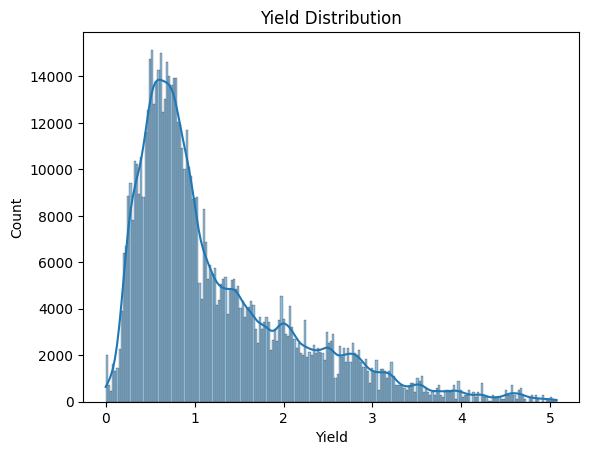

In [37]:
sns.histplot(Yield_Pred1['Yield'], kde=True)
plt.title('Yield Distribution')
plt.show()

The histogram shows the distribution of crop yield, which appears to be skewed to the right. This indicates that most crops have lower yields, with fewer crops having very high yields.

<Axes: >

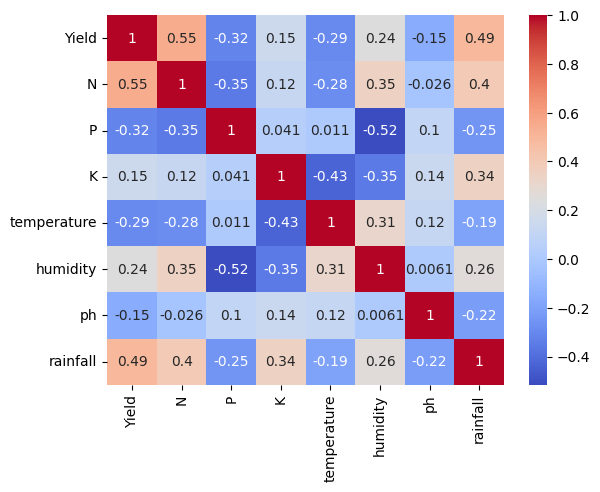

In [38]:
sns.heatmap(Yield_Pred1.corr(numeric_only=True), annot=True, cmap='coolwarm')

The heatmap revealed key correlations among environmental parameters and yield. Nitrogen (N), Phosphorus (P), and Potassium (K) showed moderate positive relationships with yield, suggesting their importance in crop productivity. Temperature and humidity were also correlated, indicating climatic influence on soil conditions.

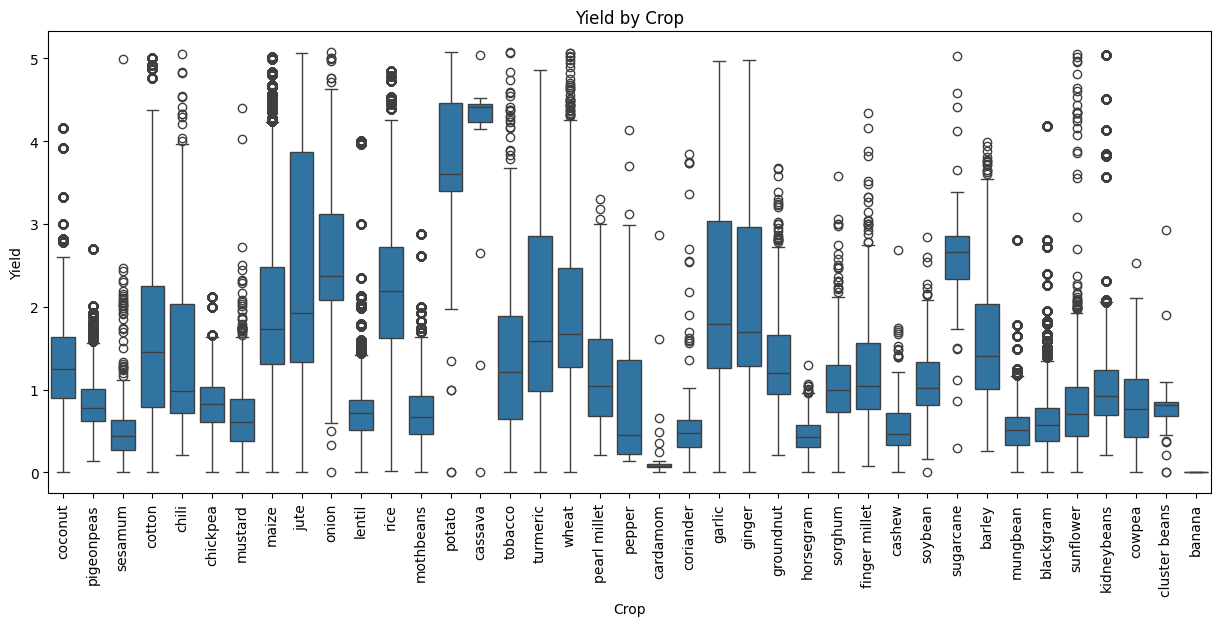

In [39]:
plt.figure(figsize=(15,6))
sns.boxplot(x='Crop', y='Yield', data=Yield_Pred1)
plt.xticks(rotation=90)
plt.title('Yield by Crop')
plt.show()


The "Yield by Crop" box plot revealed significant variability in yield across different crops. Some crops like sugarcane and banana showed consistently high median yields, while others like lentil and mothbeans had lower and more dispersed distributions. The presence of outliers in several crops suggests occasional extreme yield values, possibly due to regional or seasonal factors.

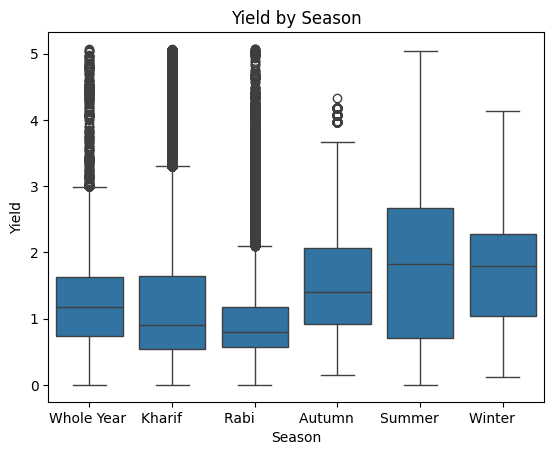

In [40]:
sns.boxplot(x='Season', y='Yield', data=Yield_Pred1)
plt.title('Yield by Season')
plt.show()


The "Yield by Season" box plot showed clear seasonal patterns in crop productivity. Rabi and Kharif seasons had higher median yields compared to Summer, suggesting better environmental alignment and resource availability during those periods. The spread of yield values was wider in Kharif, indicating more variability across crops and regions.

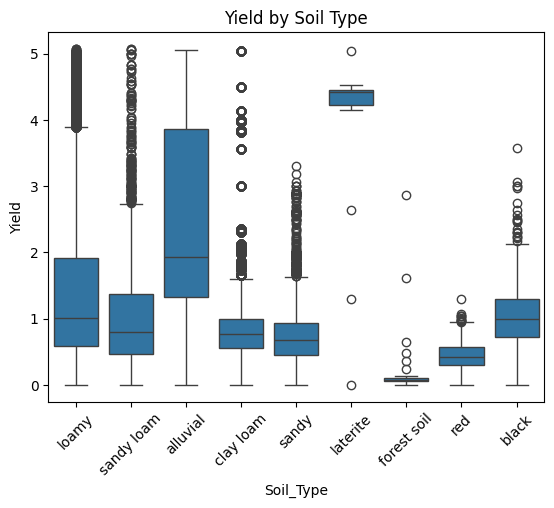

In [41]:
sns.boxplot(x='Soil_Type', y='Yield', data=Yield_Pred1)
plt.xticks(rotation=45)
plt.title('Yield by Soil Type')
plt.show()


The "Yield by Soil Type" box plot revealed distinct productivity patterns across soil categories. Loamy and sandy loam soils showed higher median yields, indicating their suitability for a wide range of crops. Clay loam and black soils had more variability, suggesting crop-specific performance.

<Axes: ylabel='Crop'>

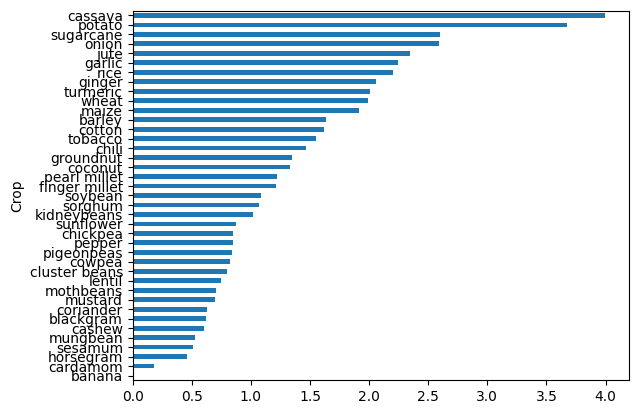

In [42]:
Yield_Pred1.groupby('Crop')['Yield'].mean().sort_values().plot(kind='barh')


The horizontal bar chart ranked crops by their average yield, making it easy to spot top performers. Sugarcane, banana, and cassava stood out with the highest mean yields, while lentil and mothbeans were on the lower end.

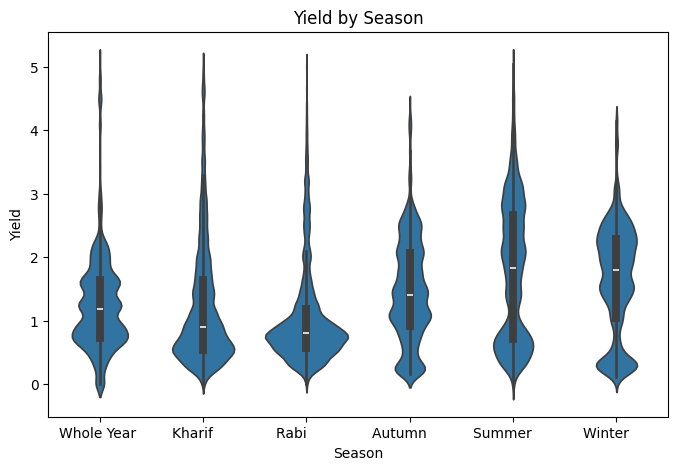

In [43]:
# Violin plot of Yield by Season
plt.figure(figsize=(8, 5))
sns.violinplot(x='Season', y='Yield', data=Yield_Pred1)
plt.title('Yield by Season')
plt.show()

The violin plot for "Yield by Season" beautifully captured both the distribution and density of yield values across seasons. Rabi and Kharif seasons showed wider violins with higher peaks, indicating more frequent high-yield observations. Summer had a narrower shape, reflecting lower and less varied yields.

**CONCLUSION FROM PREPROCESSING AND EDA**

After thorough preprocessing and EDA, the dataset revealed strong patterns in crop yield influenced by season, soil type, and environmental factors. Crops like sugarcane and banana consistently delivered high yields, especially during Rabi and Kharif seasons. Loamy and sandy loam soils emerged as the most productive, while nutrients like N, P, and K showed moderate positive correlations with yield. Visualizations highlighted both distribution and density, helping isolate stable, high-performing combinations. These insights lay a solid foundation for predictive modeling and targeted agricultural strategies.